Métodos directos estocasticos
===

* 30:00 min | Última modificación: Mayo 19, 2021 | [YouTube]

## Definición del problema

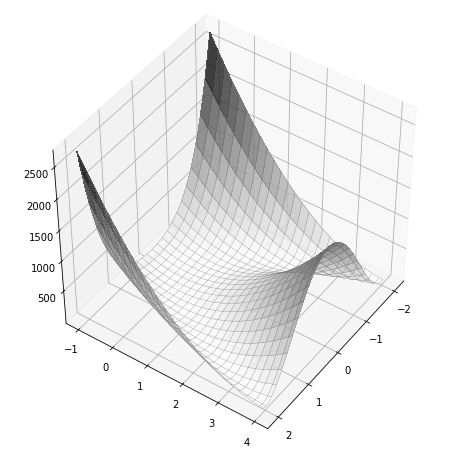

In [1]:
from plots import plot_contour, plot_surface
from testfunctions import rosenbrock as fn

#
# Se desea encontrar el punto de mínima de la función de
# Rosenbrock de dos dimensiones. El punto de mínima es
# f(1, 1) = 0. La región de busqueda es
#
#    -2.048 < x < 2.048
#       -1. < y < 4.
#
plot_surface(
    fn,
    x_bounds=[(-2.048, 2.048), (-1, 4)],
)

## Quimiotaxismo Bacterial

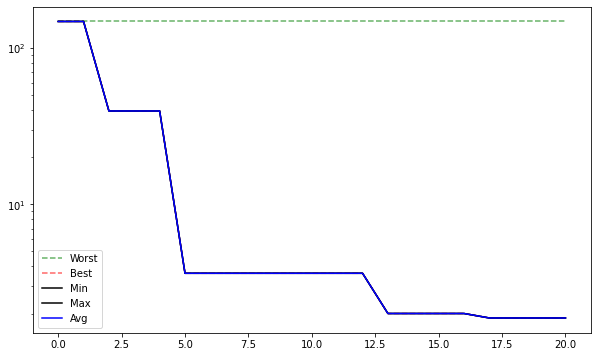

In [2]:
from bacterialchemotaxis import BacterialChemotaxis
from fnevaluator import FnEvaluator
from generators import RandomUniform
from stats import Statistics

monte_carlo = RandomUniform(
    pop_size=1,
    low=[-2.048, -1.0],
    high=[2.048, 4.0],
)
evaluator = FnEvaluator(fn)
stats = Statistics()

optimizer = BacterialChemotaxis(fn=fn)


solutions = monte_carlo()
solutions = evaluator(solutions)
stats(solutions)

NITER = 20

for iter in range(NITER):
    solutions = optimizer(solutions)
    stats(solutions)

stats.plot()

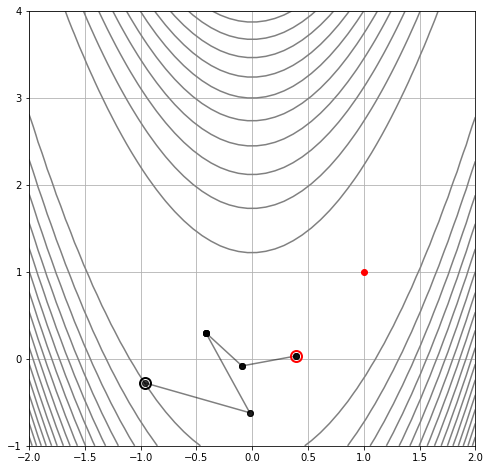

In [3]:
#
# Trayectoria del punto inicial al punto final
#
from plots import plot_trayectory

plot_trayectory(stats, fn, x_bounds=[(-2, 2), (-1, 4)], minimum=[(1, 1)])

## Temple Simulado

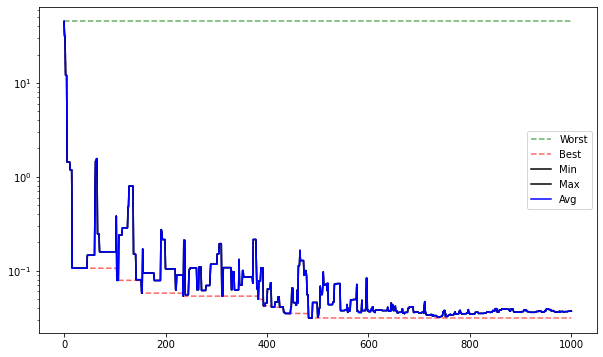

In [5]:
from fnevaluator import FnEvaluator
from generators import RandomUniform
from stats import Statistics
from simulatedannealing import SimulatedAnnealing


monte_carlo = RandomUniform(
    pop_size=1,
    low=[-2.048, -1.0],
    high=[2.048, 4.0],
)
evaluator = FnEvaluator(fn)
stats = Statistics()

optimizer = SimulatedAnnealing(fn=fn)


solutions = monte_carlo()
solutions = evaluator(solutions)
stats(solutions)

NITER = 1000

for iter in range(NITER):
    solutions = optimizer(solutions)
    stats(solutions)

stats.plot()

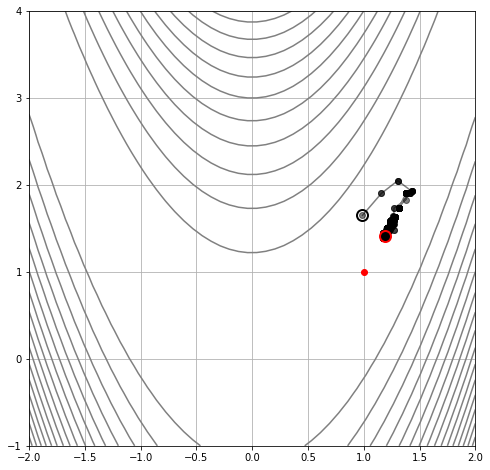

In [6]:
#
# Trayectoria del punto inicial al punto final
#
from plots import plot_trayectory

plot_trayectory(stats, fn, x_bounds=[(-2, 2), (-1, 4)], minimum=[(1, 1)])

## Threshold Acceptance

In [7]:
import numpy as np
from baseoptimizer import BaseOptimizer


class ThresholdAcceptance(BaseOptimizer):
    def __init__(self, fn, threshold=10, R=1.0, M=1000):
        super().__init__(fn=fn)
        self.threshold = threshold
        self.R = R
        self.M = M
        self.factor = None

    def __call__(self, population):

        if self.n_dim is None:
            self.n_dim = len(population[0].x)

        if self.factor is None:
            self.factor = np.power(1e-6 / self.threshold, 1.0 / self.M)

        for individual in population:

            if "threshold" not in individual.keys():
                individual["threshold"] = self.threshold

            x = individual.x.copy()
            fn_x = individual.fn_x

            v = self.random_direction()
            x_next = x + np.random.uniform() * self.R * v
            fn_x_next = self.fn(x_next)

            if (fn_x_next - fn_x) <= individual.threshold:
                individual.x = x_next
                individual.fn_x = fn_x_next
                individual.threshold = individual.threshold * self.factor

        return population

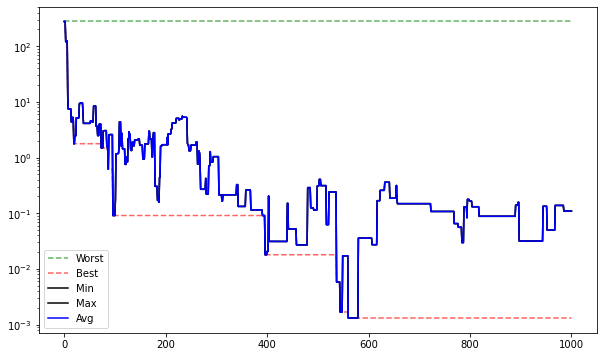

In [8]:
from fnevaluator import FnEvaluator
from generators import RandomUniform
from stats import Statistics
from thresholdacceptance import ThresholdAcceptance


monte_carlo = RandomUniform(
    pop_size=1,
    low=[-2.048, -1.0],
    high=[2.048, 4.0],
)
evaluator = FnEvaluator(fn)
stats = Statistics()

optimizer = ThresholdAcceptance(fn=fn, M=500)


solutions = monte_carlo()
solutions = evaluator(solutions)
stats(solutions)

NITER = 1000

for iter in range(NITER):
    solutions = optimizer(solutions)
    stats(solutions)

stats.plot()

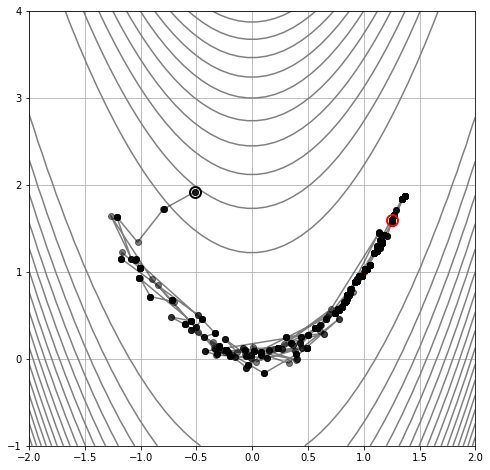

In [9]:
from plots import plot_trayectory

plot_trayectory(
    stats,
    fn,
    x_bounds=[(-2, 2), (-1, 4)],
    minimum=[(1, 1)],
)